In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cleaned_Data.csv')
df.head()

,DISTRICT,POLICE STATION,DATE,DAY,ACCIDENT TYPE,WEATHER CONDITION,VEHICLE TYPE,COLLITION TYPE,ROAD TYPE,DRIVER AGE,24_HOUR_TIME
0,ARIYALUR,ANDIMADAM,2017-01-18,Wednesday,FATAL,FINE,BUS,HEAD ON,STATE HIGHWAY,50,11:30:00
1,ARIYALUR,ANDIMADAM,2017-01-24,Tuesday,SIMPLE INJURY (HOSPITALISED),FINE,MOTOR CYCLE,HIT PEDESTRIAN,STATE HIGHWAY,30,11:00:00
2,ARIYALUR,ANDIMADAM,2017-01-15,Sunday,FATAL,FINE,MOPED,HIT FROM REAR,STATE HIGHWAY,30,10:30:00
3,ARIYALUR,ANDIMADAM,2017-01-26,Thursday,SIMPLE INJURY (HOSPITALISED),FINE,CAR LMV,HIT FROM REAR,STATE HIGHWAY,45,16:15:00
4,ARIYALUR,ANDIMADAM,2017-02-07,Tuesday,FATAL,FINE,MOTOR CYCLE,HIT PEDESTRIAN,STATE HIGHWAY,35,19:30:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59283 entries, 0 to 59282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DISTRICT           59283 non-null  object
 1   POLICE STATION     59283 non-null  object
 2   DATE               59283 non-null  object
 3   DAY                59283 non-null  object
 4   ACCIDENT TYPE      59283 non-null  object
 5   WEATHER CONDITION  59283 non-null  object
 6   VEHICLE TYPE       59283 non-null  object
 7   COLLITION TYPE     59283 non-null  object
 8   ROAD TYPE          59283 non-null  object
 9   DRIVER AGE         59283 non-null  int64 
 10  24_HOUR_TIME       59283 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.0+ MB


first, let's work on accidents that are present by District.

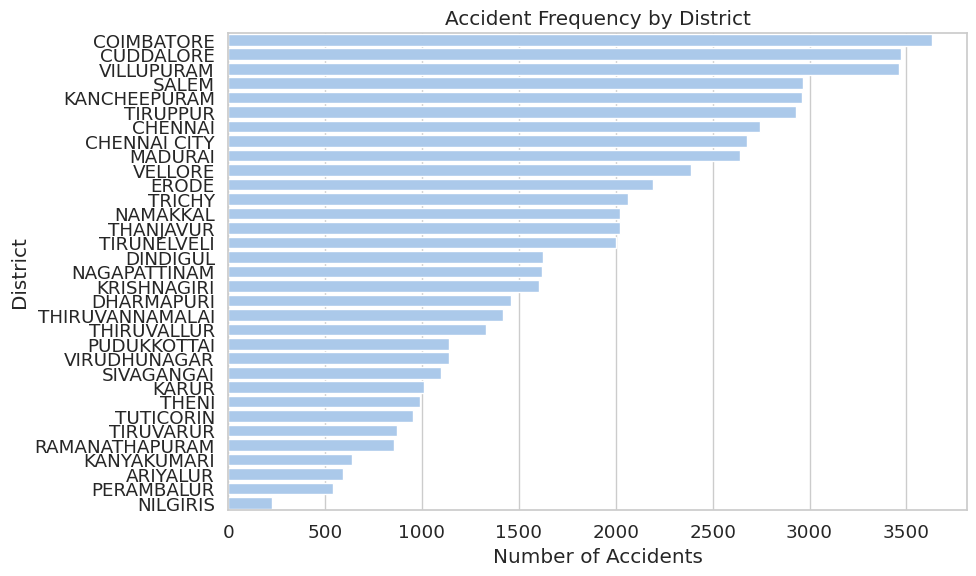

In [10]:
# Accident Frequency by District
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='DISTRICT', order=df['DISTRICT'].value_counts().index)
plt.title('Accident Frequency by District')
plt.xlabel('Number of Accidents')
plt.ylabel('District')
plt.tight_layout()
plt.show()


Let's try and get a fancy type of plot to show the accidents by district.

/tmp/ipykernel_81411/2377298324.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_counts, y=accident_counts.index, palette="viridis")


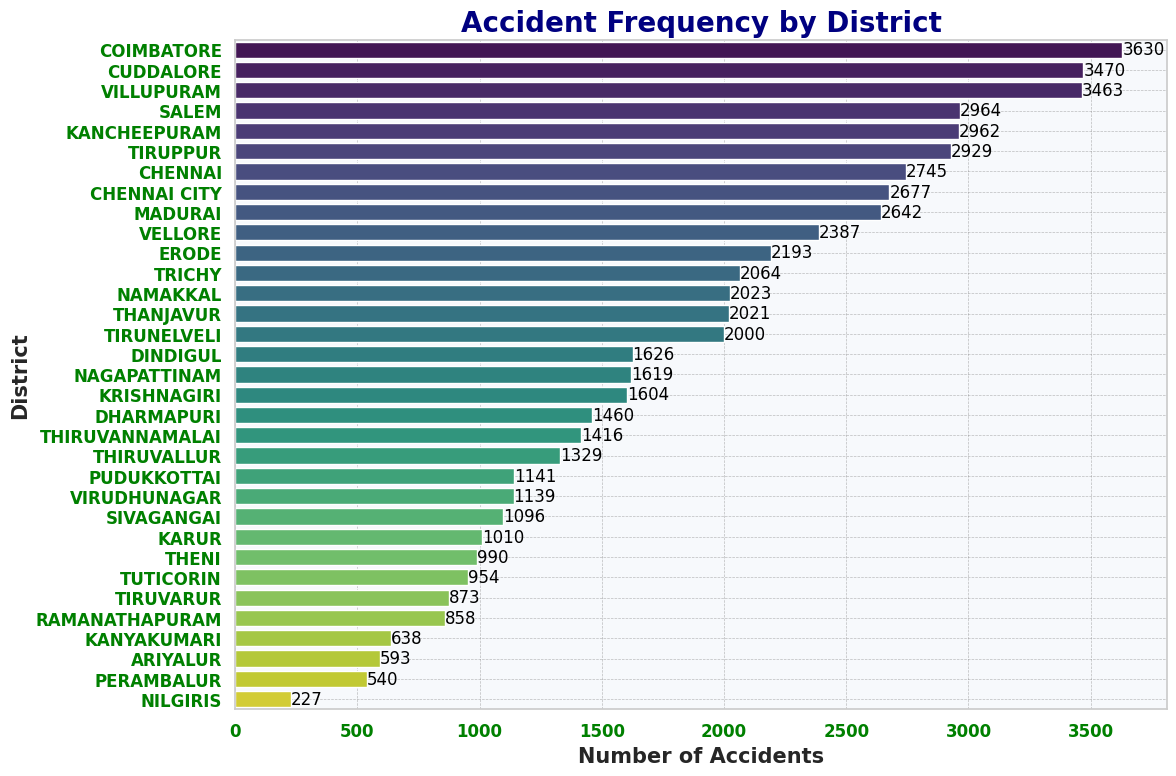

In [9]:
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Creating the plot
plt.figure(figsize=(12, 8))  # Adjust for more space
accident_counts = df['DISTRICT'].value_counts()
sns.barplot(x=accident_counts, y=accident_counts.index, palette="viridis")

# Adding annotations and titles
plt.title('Accident Frequency by District', fontsize=20, fontweight='bold', color="navy")
plt.xlabel('Number of Accidents', fontsize=15, fontweight='bold')
plt.ylabel('District', fontsize=15, fontweight='bold')

# Customizing ticks
plt.xticks(fontsize=12, fontweight='bold', color="green")
plt.yticks(fontsize=12, fontweight='bold', color="green")

# Adding a colorful background
plt.gca().set_facecolor('#f7f9fc')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

# Adding value labels
for index, value in enumerate(accident_counts):
    plt.text(value, index, str(value), color='black', fontsize=12, verticalalignment='center')

# Show plot
plt.tight_layout()
plt.show()


Maybe something in dark mode will be nice?

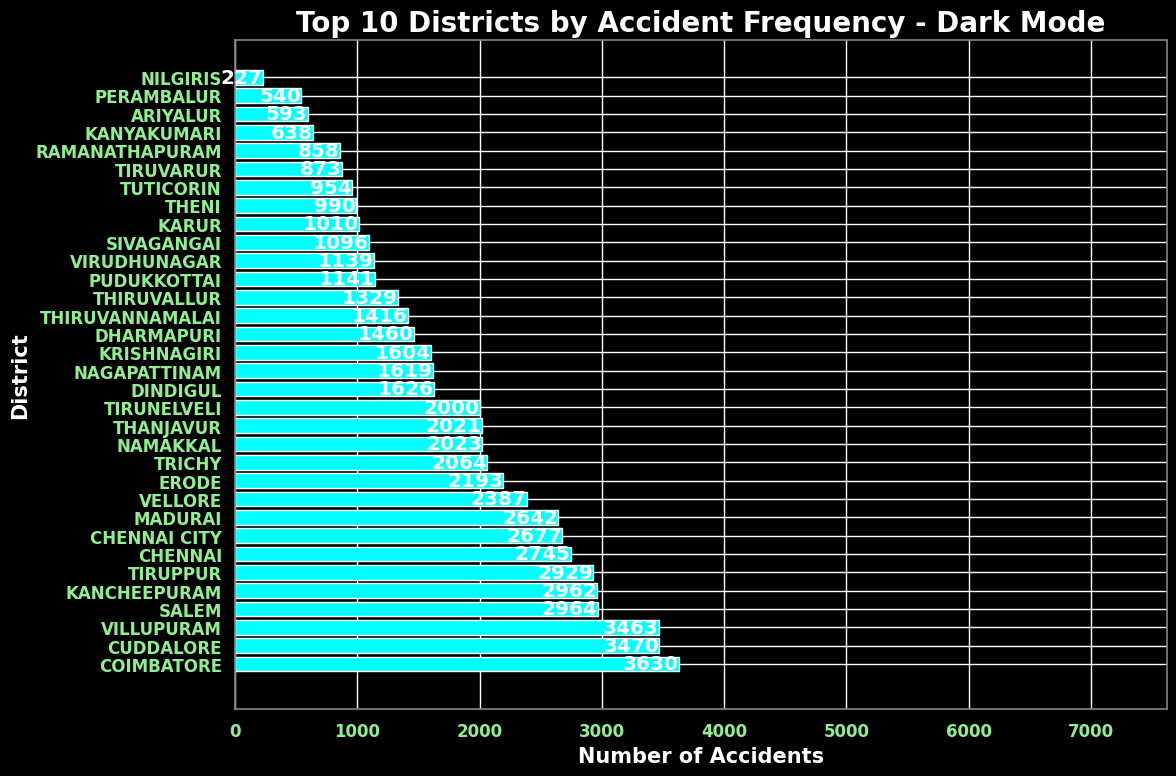

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting dark background
plt.style.use('dark_background')

# Creating the data
accident_counts = df['DISTRICT'].value_counts()
districts = accident_counts.index
counts = accident_counts.values

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Generating bars
bars = plt.barh(districts, counts, color='cyan')

# Adding shadows for a pseudo-3D effect
for bar in bars:
    # Adding a shadow
    ax.barh(bar.get_y(), bar.get_width(), height=bar.get_height(), color='black', alpha=0.3, zorder=-1, linewidth=0, left=bar.get_width() - 3)

# Adding grid, titles, and labels with styling
plt.title('Top 10 Districts by Accident Frequency - Dark Mode', fontsize=20, fontweight='bold', color='white')
plt.xlabel('Number of Accidents', fontsize=15, fontweight='bold', color='white')
plt.ylabel('District', fontsize=15, fontweight='bold', color='white')

plt.xticks(fontsize=12, fontweight='bold', color='lightgreen')
plt.yticks(fontsize=12, fontweight='bold', color='lightgreen')

# Customizing spines to lighten them
ax.spines['top'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')

# Adding value labels
for i, (value, name) in enumerate(zip(counts, districts)):
    ax.text(value - 3, i,     # X, Y positions
            str(value), 
            color='white', 
            fontweight='bold', 
            ha='right', 
            va='center')

# Show plot
plt.tight_layout()
plt.show()


naa, looks hella clumsy, let's go back

/tmp/ipykernel_81411/1802336094.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_counts_by_day.index, y=accident_counts_by_day.values, palette=colors, ax=ax)


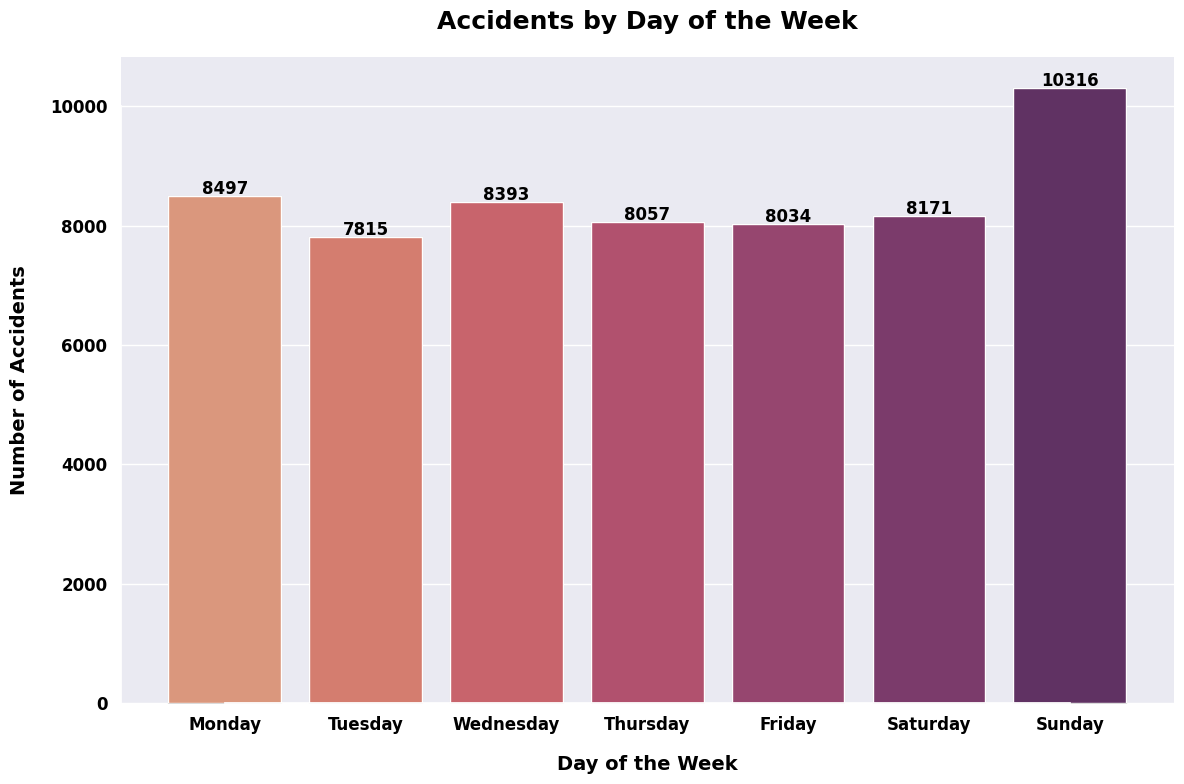

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set a custom seaborn style
sns.set_style("darkgrid")

# Define a custom color palette with gradient colors
colors = sns.color_palette("flare", 7)

# Prepare data
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
accident_counts_by_day = df['DAY'].value_counts().reindex(day_order)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=accident_counts_by_day.index, y=accident_counts_by_day.values, paimport matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensuring compatibility with the dark theme
plt.style.use('dark_background')

# Data Preparation
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
accident_counts_by_day = df['DAY'].value_counts().reindex(day_order)

# Setting a dark theme for the plot
sns.set_theme(style="dark", palette="deep")

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Generating colors
colors = sns.color_palette("hsv", n_colors=len(accident_counts_by_day))

# Bar plot with a loop to create gradient-like bars
for i, (day, count) in enumerate(accident_counts_by_day.items()):
    ax.bar(day, count, color=colors[i], zorder=3, edgecolor='black', linewidth=0.5)

# Customizing the plot aesthetics
ax.set_title('Accidents by Day of the Week', fontsize=20, fontweight='bold', color='white')
ax.set_xlabel('Day of the Week', fontsize=16, fontweight='bold', color='white')
ax.set_ylabel('Number of Accidents', fontsize=16, fontweight='bold', color='white')
ax.tick_params(axis='both', which='major', labelsize=12, colors='white')

# Adding grid and setting it behind bars
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_axisbelow(True)

# Removing the top and right spines
sns.despine()

# Customizing the ticks for elegance
ax.tick_params(axis='x', rotation=45)

# Enhancing the overall look with a tight layout
plt.tight_layout()

# Show plot
plt.show()
lette=colors, ax=ax)

# Add shadows for a 3D effect
for bar, color in zip(ax.patches, colors):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    ax.fill_between([x, x+width], 0, height, color='grey', alpha=0.2, zorder=-1)

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, fontweight='bold',
                color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
ax.set_title('Accidents by Day of the Week', fontsize=18, fontweight='bold', color='black', pad=20)
ax.set_xlabel('Day of the Week', fontsize=14, fontweight='bold', color='black', labelpad=15)
ax.set_ylabel('Number of Accidents', fontsize=14, fontweight='bold', color='black', labelpad=15)

# Customize tick labels
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Adjust layout and remove spines
sns.despine(trim=True)
plt.tight_layout()

# Show plot
plt.show()


In [20]:
!pip install plotly

In [27]:
!pip install 'nbformat>=4.2.0'


In [30]:
import plotly.express as px

# Data preparation
accident_type_counts = df['ACCIDENT TYPE'].value_counts()

# Create the pie chart
fig = px.pie(accident_type_counts, values=accident_type_counts.values, names=accident_type_counts.index,
             title='Distribution of Accident Types', hole=0.3, color_discrete_sequence=px.colors.sequential.Agsunset)

# Make it fancy
fig.update_traces(textinfo='percent+label', pull=[0.1]*len(accident_type_counts),
                  marker=dict(line=dict(color='#000000', width=2)),
                  hoverinfo='label+percent', textfont_size=14)

fig.update_layout(title_text='Distribution of Accident Types',
                  title_font=dict(size=22, color='black', family="Arial, sans-serif"),
                  legend_title_font_color="blue",
                  legend_title_text='Accident Type',
                  legend_font_size=14,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  showlegend=True)

# Show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [29]:
!pip install notebook
!pip install ipywidgets
!jupyter nbextension enable --py --sys-prefix widgetsnbextension  # For Jupyter Notebook
!jupyter labextension install @jupyter-widgets/jupyterlab-manager  # For JupyterLab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 610.0 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.3/380.3 kB 506.9 kB/s eta 0:00:001m519.7 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 550.0 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 713.8 kB/s eta 0:00:001m636.6 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 619.8 kB/s eta 0:00:001m712.5 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 558.6 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 625.2 kB/s eta 0:00:001m731.6 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 626.2 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 745.7 kB/s eta 0:00:001m673.1 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.3/257.3 kB 584.3 kB/s eta 0:00:001

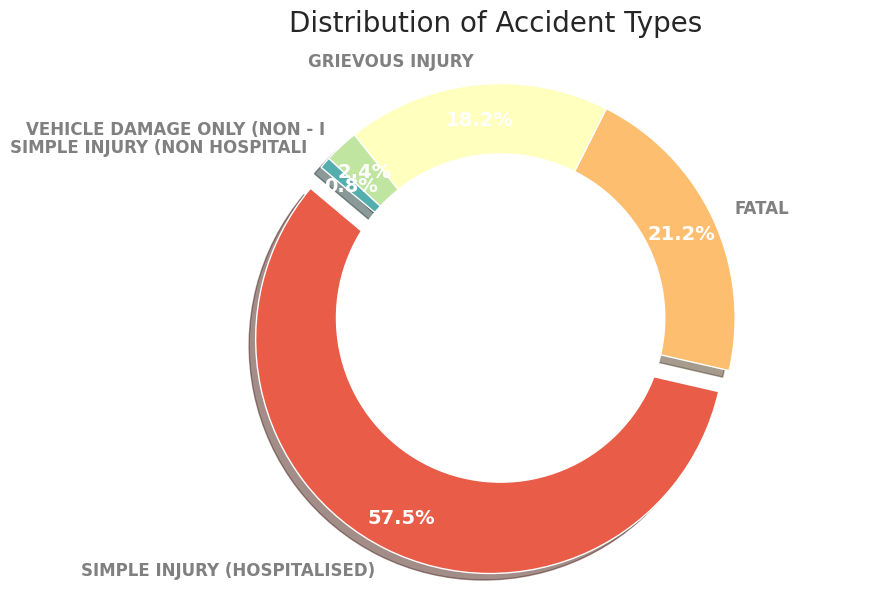

In [33]:
accident_counts = df['ACCIDENT TYPE'].value_counts()

# Set the aesthetic style of the plots
sns.set(style="white")

# Enhanced color palette
colors = sns.color_palette('Spectral', len(accident_counts))

# Create the pie chart with more customizations
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(accident_counts, labels=accident_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=[0.1 if i == accident_counts.idxmax() else 0 for i in accident_counts.index], pctdistance=0.85)

# Draw a circle at the center of pie to make it look like a doughnut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

plt.title('Distribution of Accident Types', fontsize=20, pad=20)

# Make the texts and percentages more fancy
for text in texts:
    text.set_color('gray')
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

# Show the plot
plt.show()


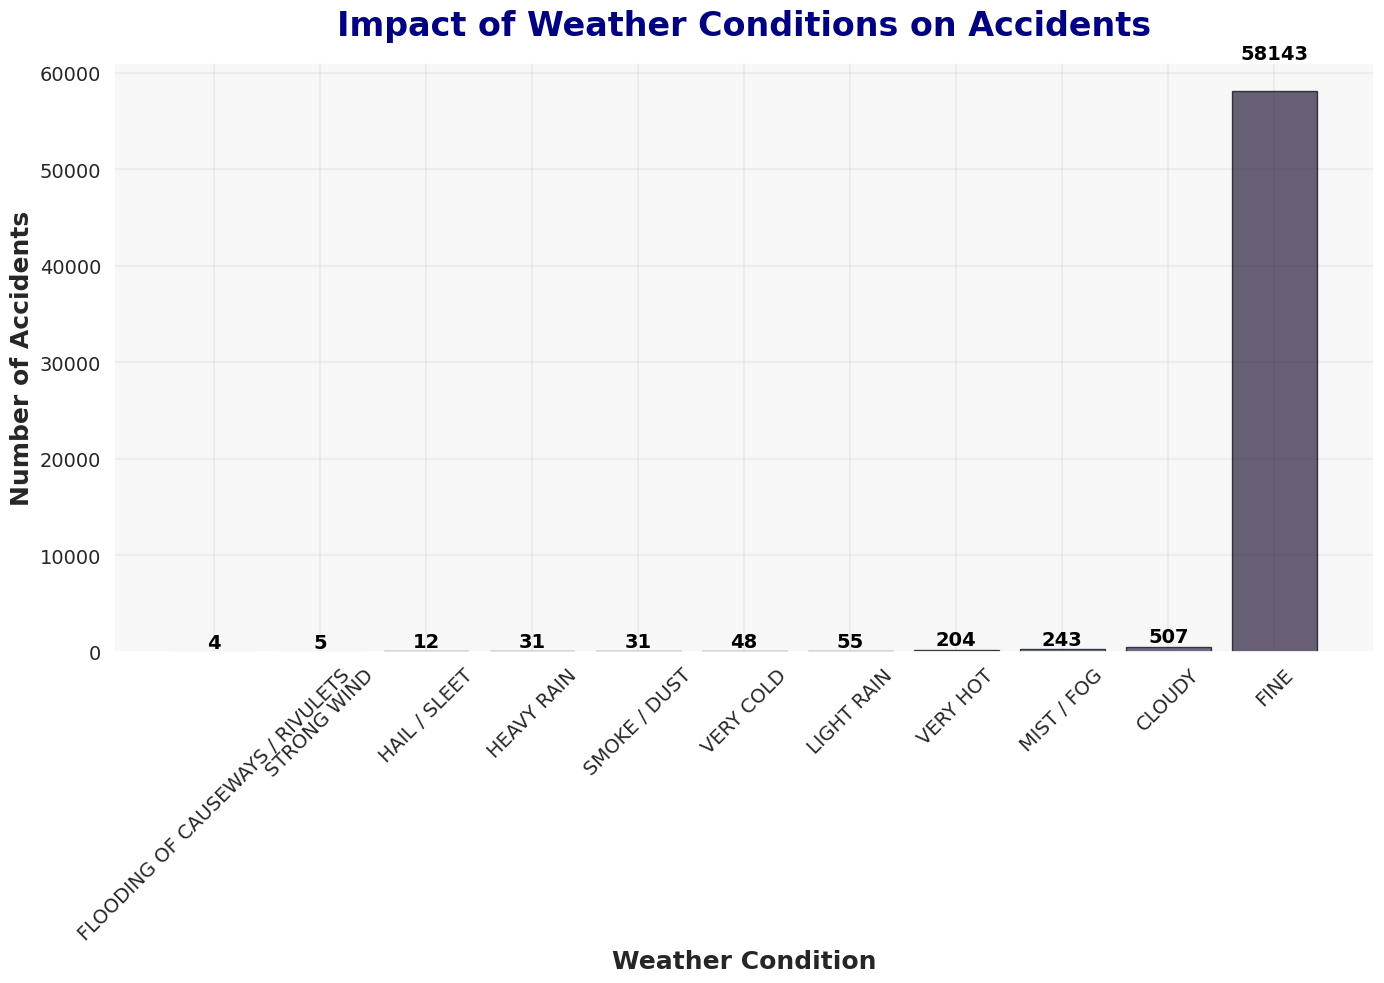

In [35]:
weather_accidents = df['WEATHER CONDITION'].value_counts().sort_values()

# Set the aesthetic style of the plots
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# Create a color palette
palette = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

# Create the bar plot
plt.figure(figsize=(14, 10))
bars = plt.bar(x=weather_accidents.index, height=weather_accidents.values, color=palette(np.linspace(0, 1, len(weather_accidents))))

# Customize the plot to make it more fancy
plt.title('Impact of Weather Conditions on Accidents', fontsize=24, color='navy', fontweight='bold', pad=20)
plt.xlabel('Weather Condition', fontsize=18, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Adding a shadow effect
for bar in bars:
    bar.set_edgecolor("black")
    bar.set_linewidth(1)
    bar.set_alpha(0.7)  # Adjust the transparency

# Adding the text labels for each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., 1.05*height, '%d' % int(height), ha='center', va='bottom', fontsize=14, color='black', fontweight='bold')

# Add a fancy background
plt.gca().set_facecolor('#f7f7f7')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()


In [36]:
bubble_size = df['Number of Accidents'] / df['Number of Accidents'].max() * 1000  # Scale for visibility

# Create a color palette
palette = sns.color_palette("cubehelix", len(df))

plt.figure(figsize=(12, 8))

# Create the bubble chart
for i, row in df.iterrows():
    plt.scatter(row['Weather Condition'], row['Number of Accidents'],
                s=bubble_size[i],  # Bubble size
                color=palette[i],  # Color
                alpha=0.6,  # Transparency
                edgecolors="w",  # White edge color for more 'bubbly' effect
                linewidth=2)  # Edge line width

# Customize the plot
plt.title('Impact of Weather Conditions on Accidents', fontsize=20, color='navy', fontweight='bold')
plt.xlabel('Weather Condition', fontsize=16, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Background and grid
plt.gca().set_facecolor('#eaeaf2')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', alpha=0.5)

# Add a fancy legend (manually)
for i, weather in enumerate(df['Weather Condition']):
    plt.scatter([], [], s=(i+1)*100, c=palette[i], alpha=0.6, label=weather)

plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


KeyError: 'Number of Accidents'

In [37]:
print(df.columns)


Index(['DISTRICT', 'POLICE STATION', 'DATE', 'DAY', 'ACCIDENT TYPE',
       'WEATHER CONDITION', 'VEHICLE TYPE', 'COLLITION TYPE', 'ROAD TYPE',
       'DRIVER AGE', '24_HOUR_TIME'],
      dtype='object')


In [38]:
vehicle_accidents = df['VEHICLE TYPE'].value_counts().reset_index()
vehicle_accidents.columns = ['Vehicle Type', 'Accidents']

/tmp/ipykernel_81411/3053650676.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/home/akz/programming/TN_Police_Research/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 2990 (\N{TAMIL LETTER MA}) missing from current font.

/home/akz/programming/TN_Police_Research/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Matplotlib currently does not support Tamil natively.

/home/akz/programming/TN_Police_Research/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 3021 (\N{TAMIL SIGN VIRAMA}) missing from current font.

/home/akz/programming/TN_Police_Research/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 2991 (\N{TAMIL LETTER YA}) missing from current font.

/home/akz/programming/TN_Police_Research/.venv/l

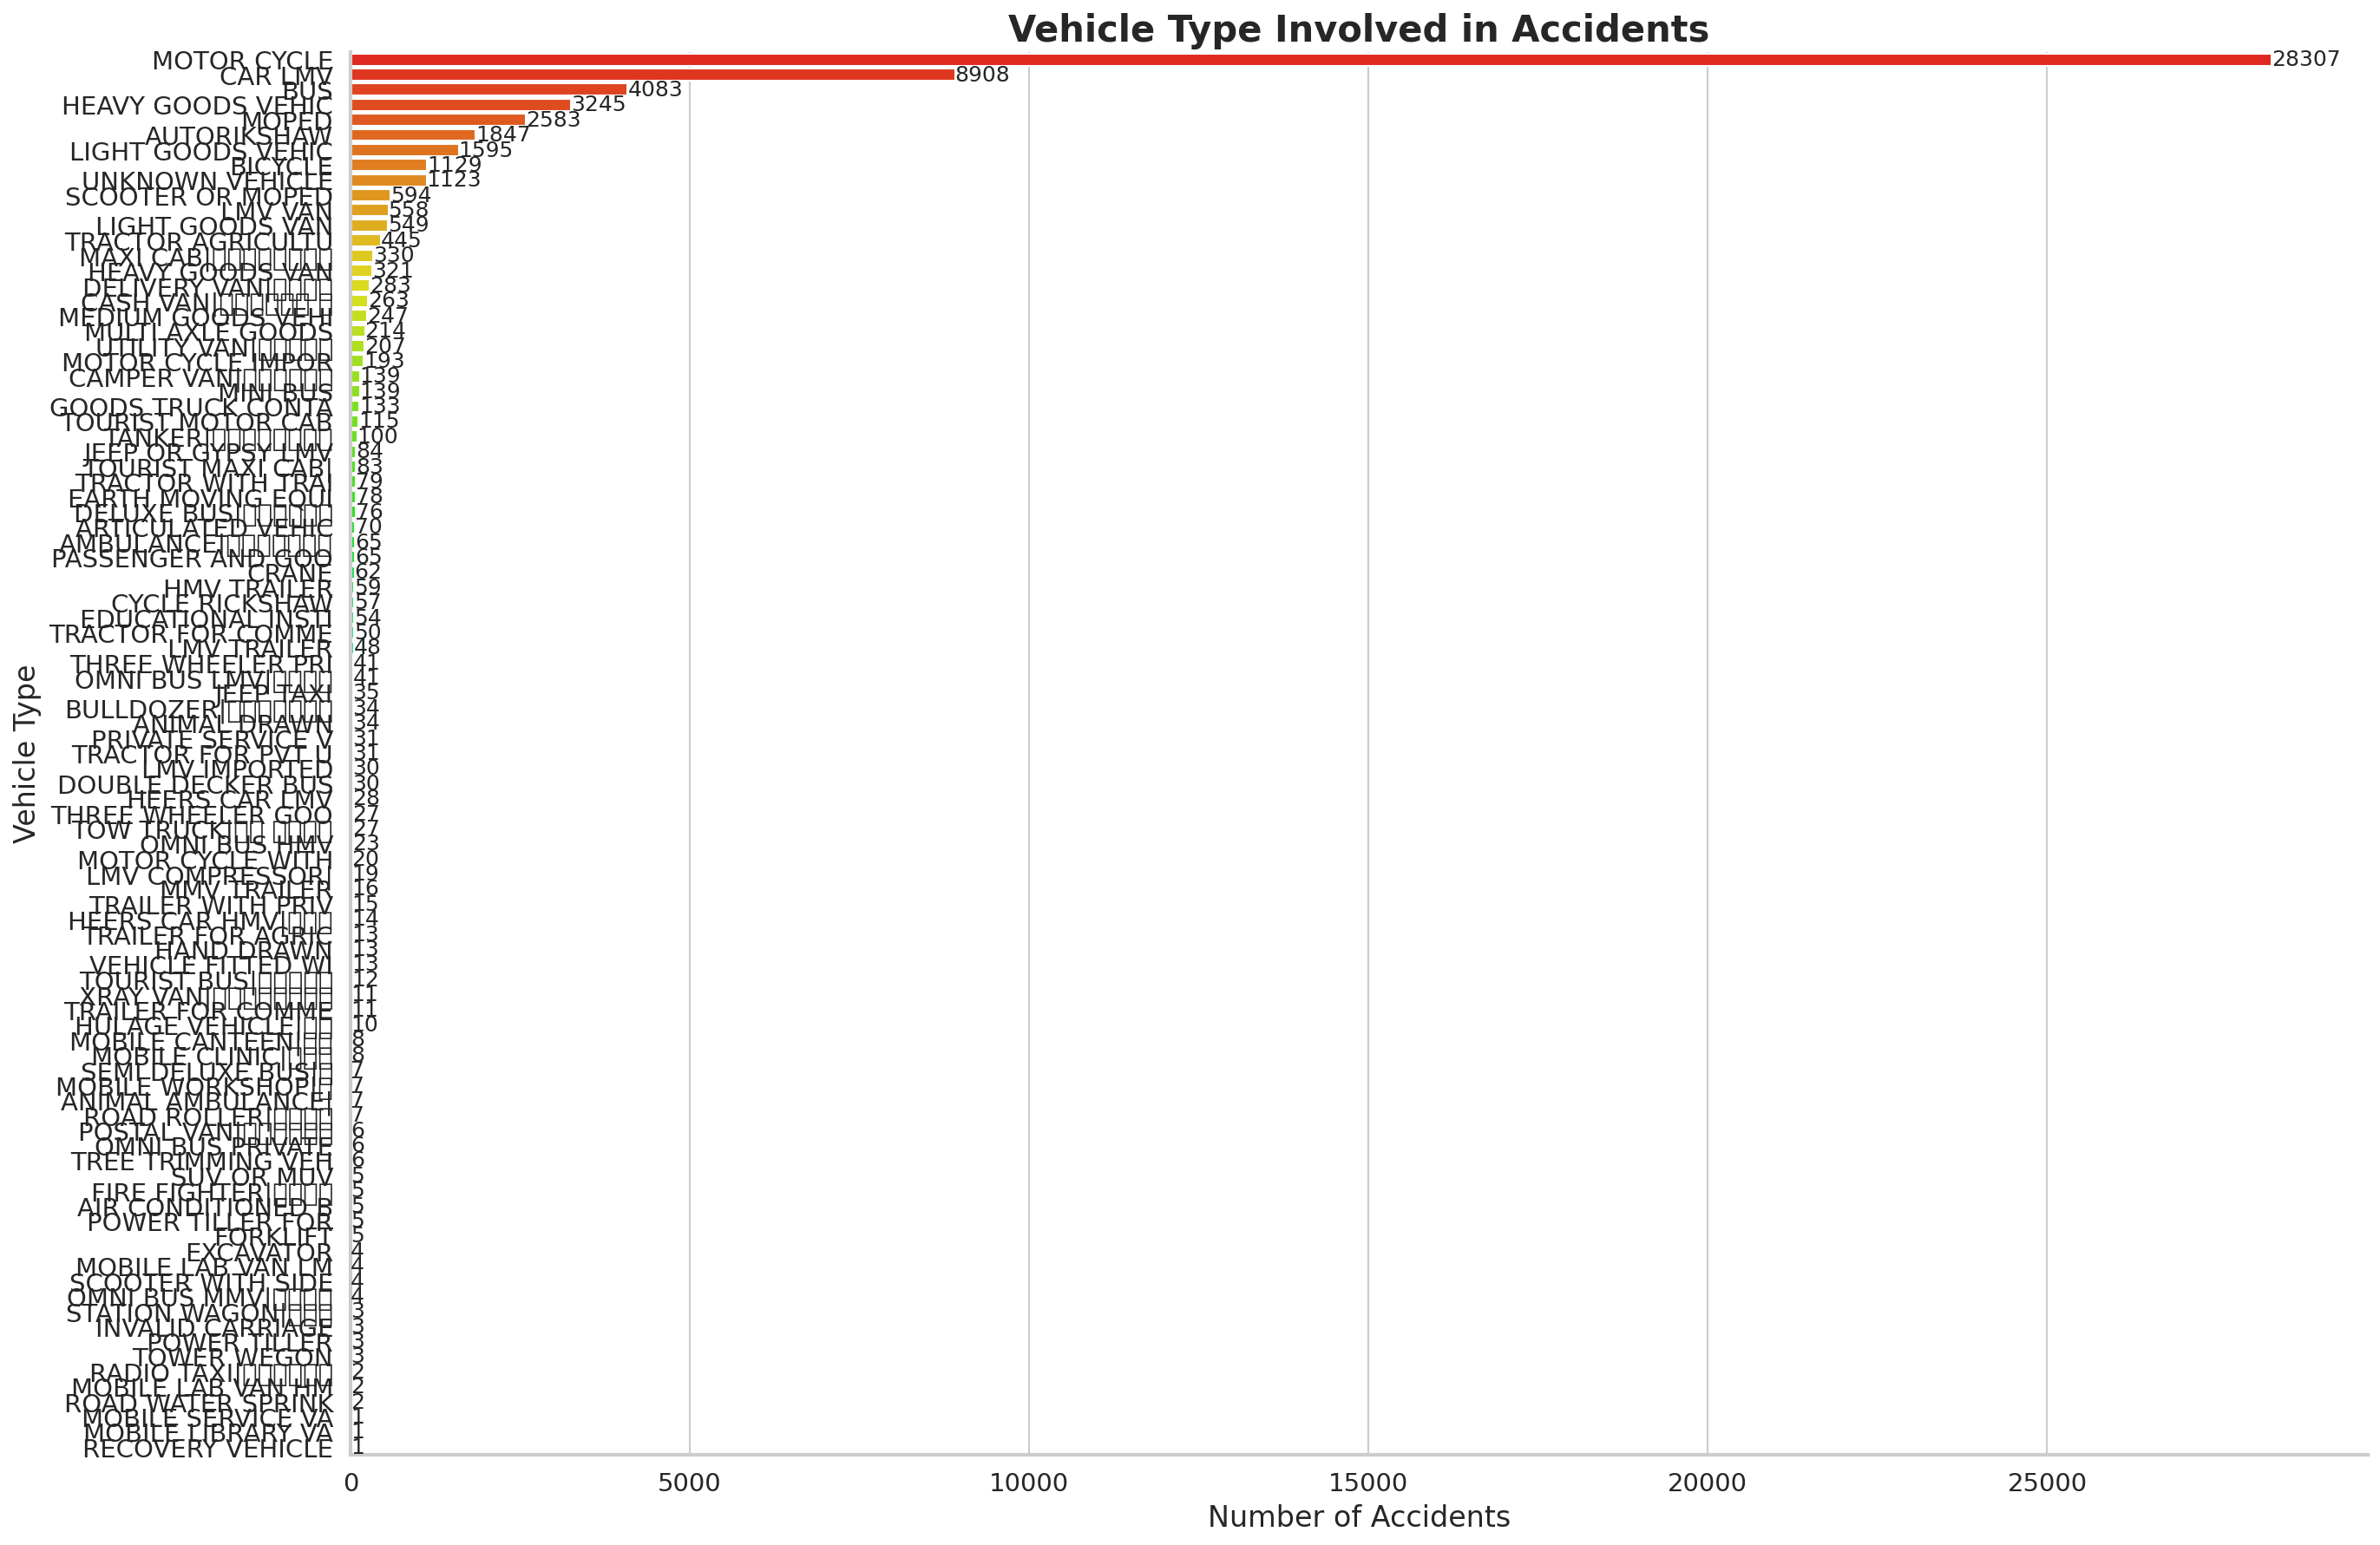

In [42]:
sns.set_style("whitegrid")

# Increase the figure size and resolution
plt.figure(figsize=(20, 14), dpi=150)  # Adjusted DPI for higher resolution

# Create a color palette
palette = sns.color_palette("hsv", len(vehicle_accidents))

# Create the bar plot
sns.barplot(x='Accidents', y='Vehicle Type', data=vehicle_accidents, palette=palette)

# Add titles and labels with appropriate font size
plt.title('Vehicle Type Involved in Accidents', fontsize=20, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=16)
plt.ylabel('Vehicle Type', fontsize=16)

# Customize tick parameters for readability without causing overlap
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a border with increased line width for visibility
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Add text labels for each bar with smaller font size
for index, value in enumerate(vehicle_accidents['Accidents']):
    plt.text(value, index, str(value), fontsize=12, va='center')

# Show the plot
plt.show()


/tmp/ipykernel_81411/3320958318.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/home/akz/programming/TN_Police_Research/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 2990 (\N{TAMIL LETTER MA}) missing from current font.

/home/akz/programming/TN_Police_Research/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Matplotlib currently does not support Tamil natively.

/home/akz/programming/TN_Police_Research/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 3021 (\N{TAMIL SIGN VIRAMA}) missing from current font.

/home/akz/programming/TN_Police_Research/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 2991 (\N{TAMIL LETTER YA}) missing from current font.

/home/akz/programming/TN_Police_Research/.venv/l

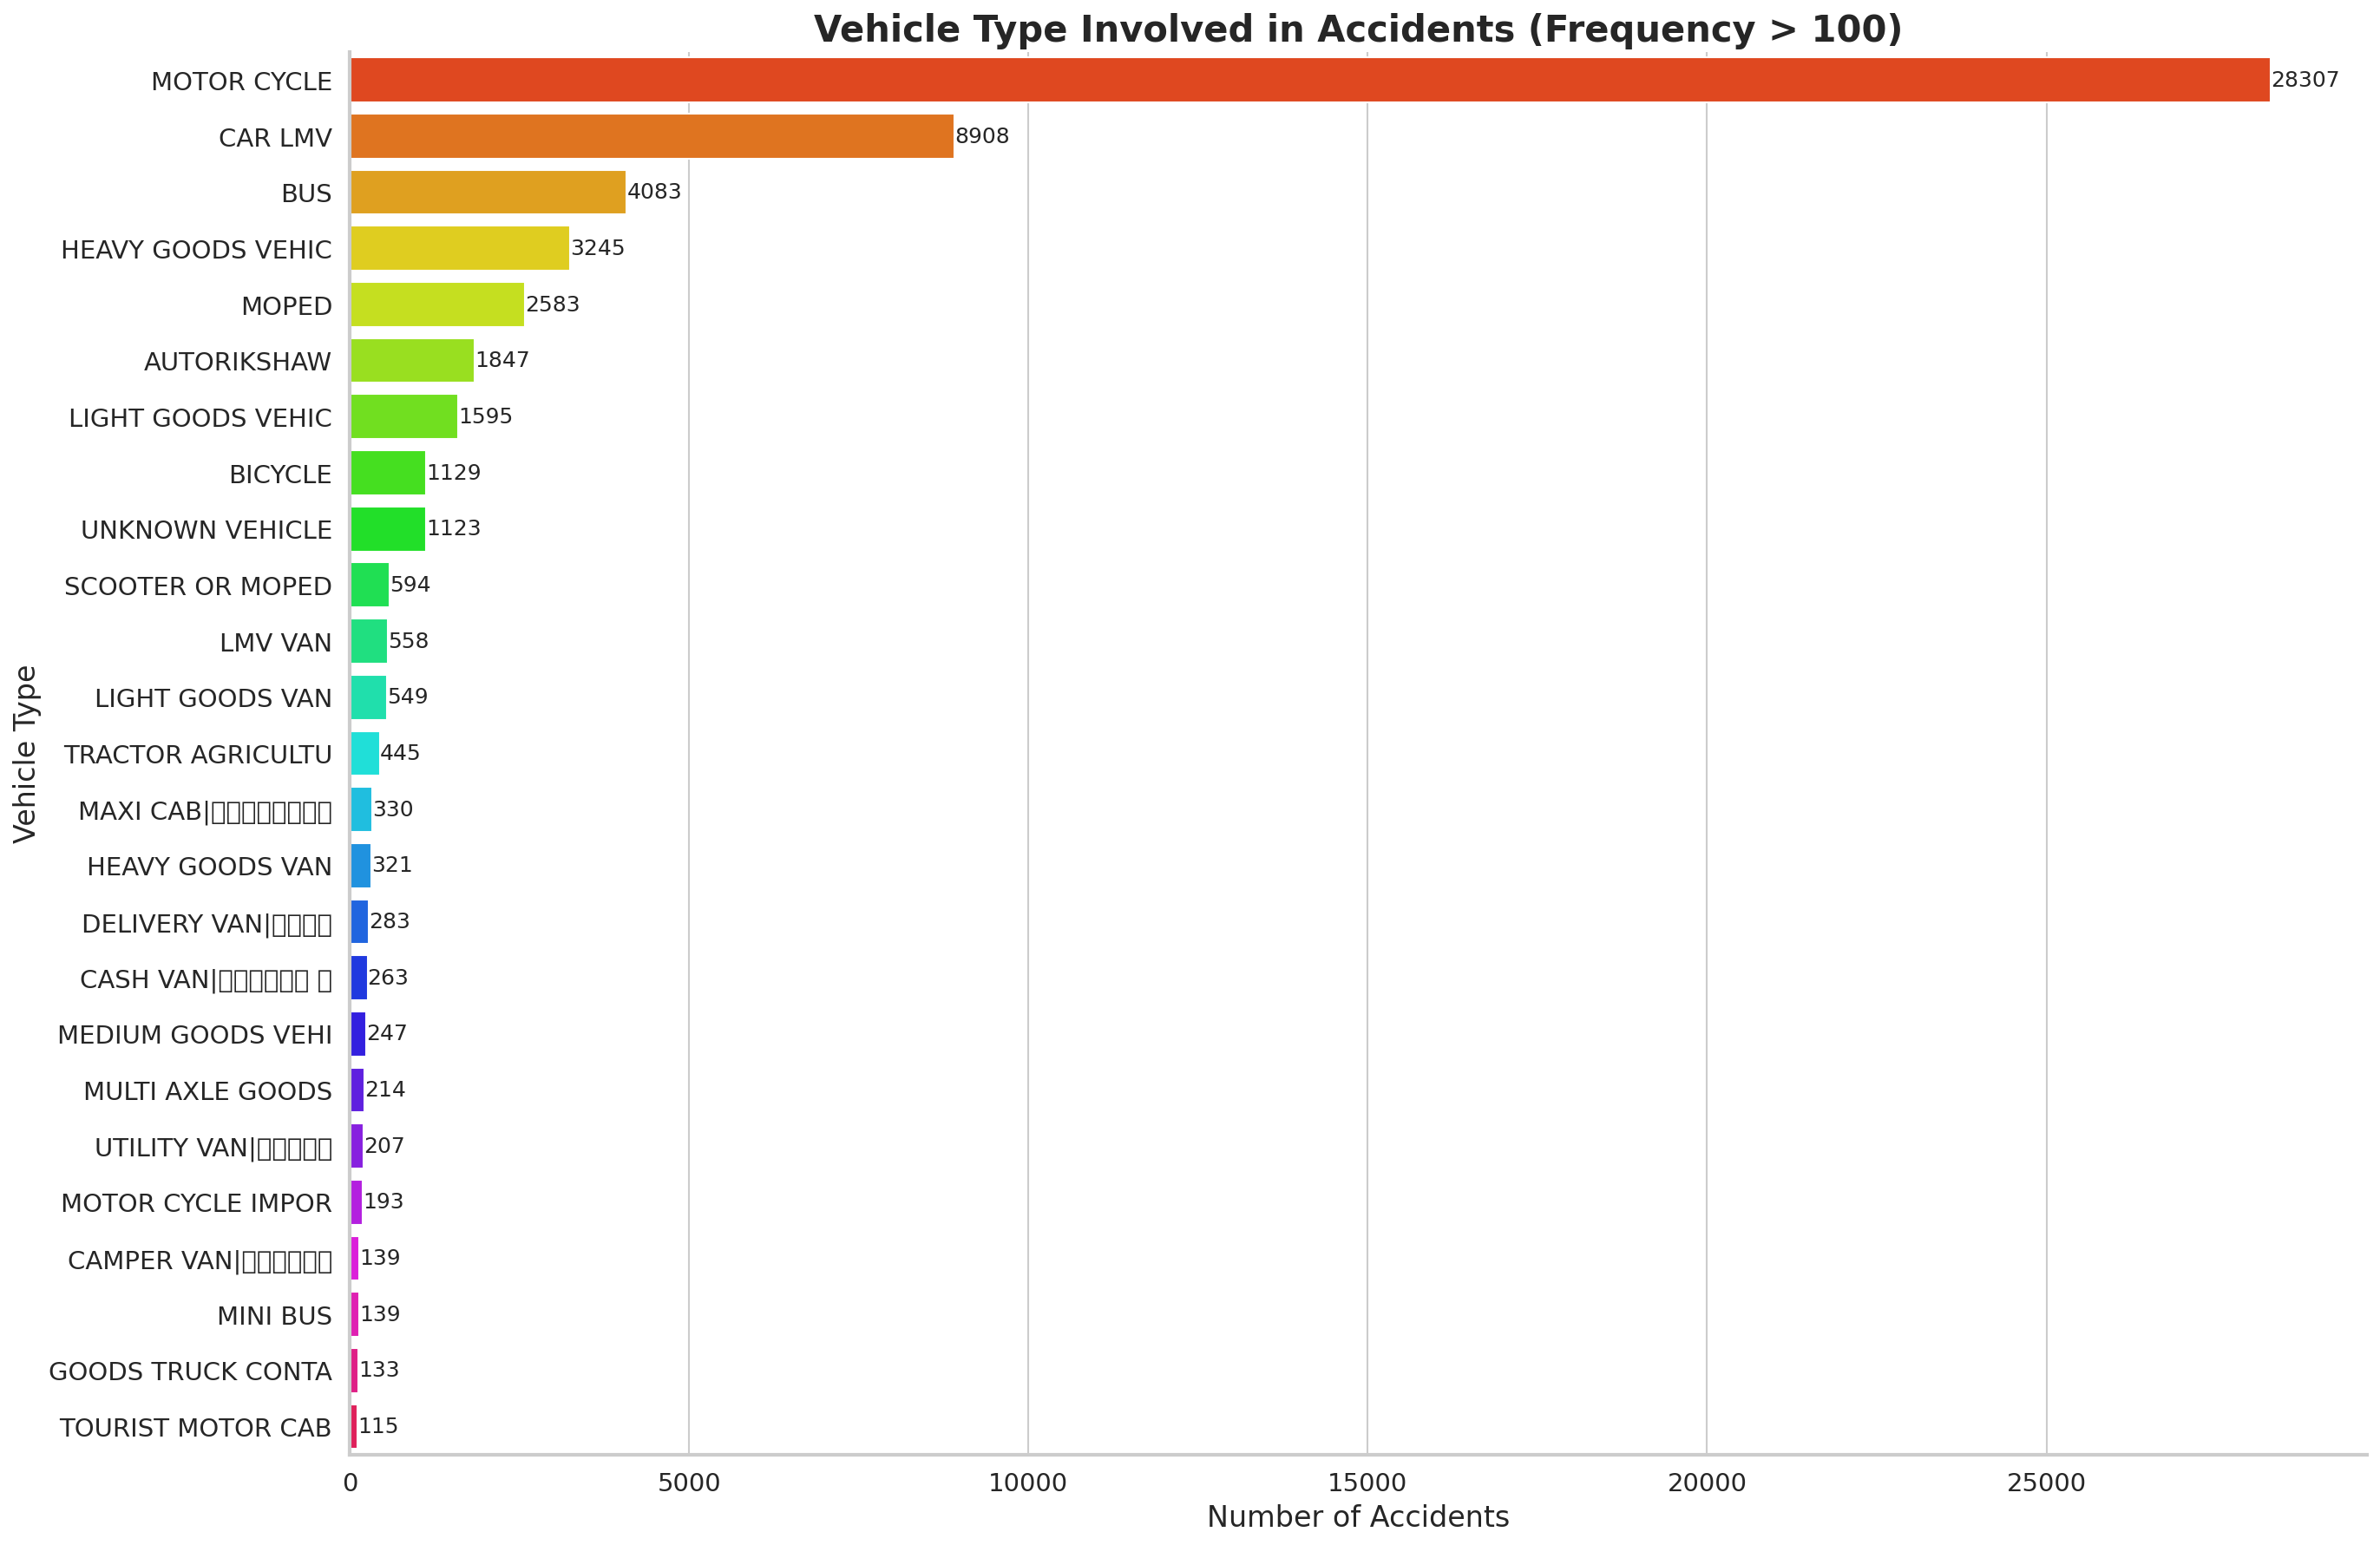

In [43]:
vehicle_accidents_filtered = vehicle_accidents[vehicle_accidents['Accidents'] > 100]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Increase the figure size and resolution
plt.figure(figsize=(20, 14), dpi=150)

# Create a color palette
palette = sns.color_palette("hsv", len(vehicle_accidents_filtered))

# Create the bar plot for the filtered dataset
sns.barplot(x='Accidents', y='Vehicle Type', data=vehicle_accidents_filtered, palette=palette)

# Add titles and labels with appropriate font size
plt.title('Vehicle Type Involved in Accidents (Frequency > 100)', fontsize=20, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=16)
plt.ylabel('Vehicle Type', fontsize=16)

# Customize tick parameters for readability without causing overlap
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a border with increased line width for visibility
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Add text labels for each bar with smaller font size
for index, value in enumerate(vehicle_accidents_filtered['Accidents']):
    plt.text(value, index, str(value), fontsize=12, va='center')

# Show the plot
plt.show()


In [44]:
collision_counts = df['COLLITION TYPE'].value_counts().reset_index()
collision_counts.columns = ['Collision Type', 'Frequency']


/tmp/ipykernel_81411/3495833581.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




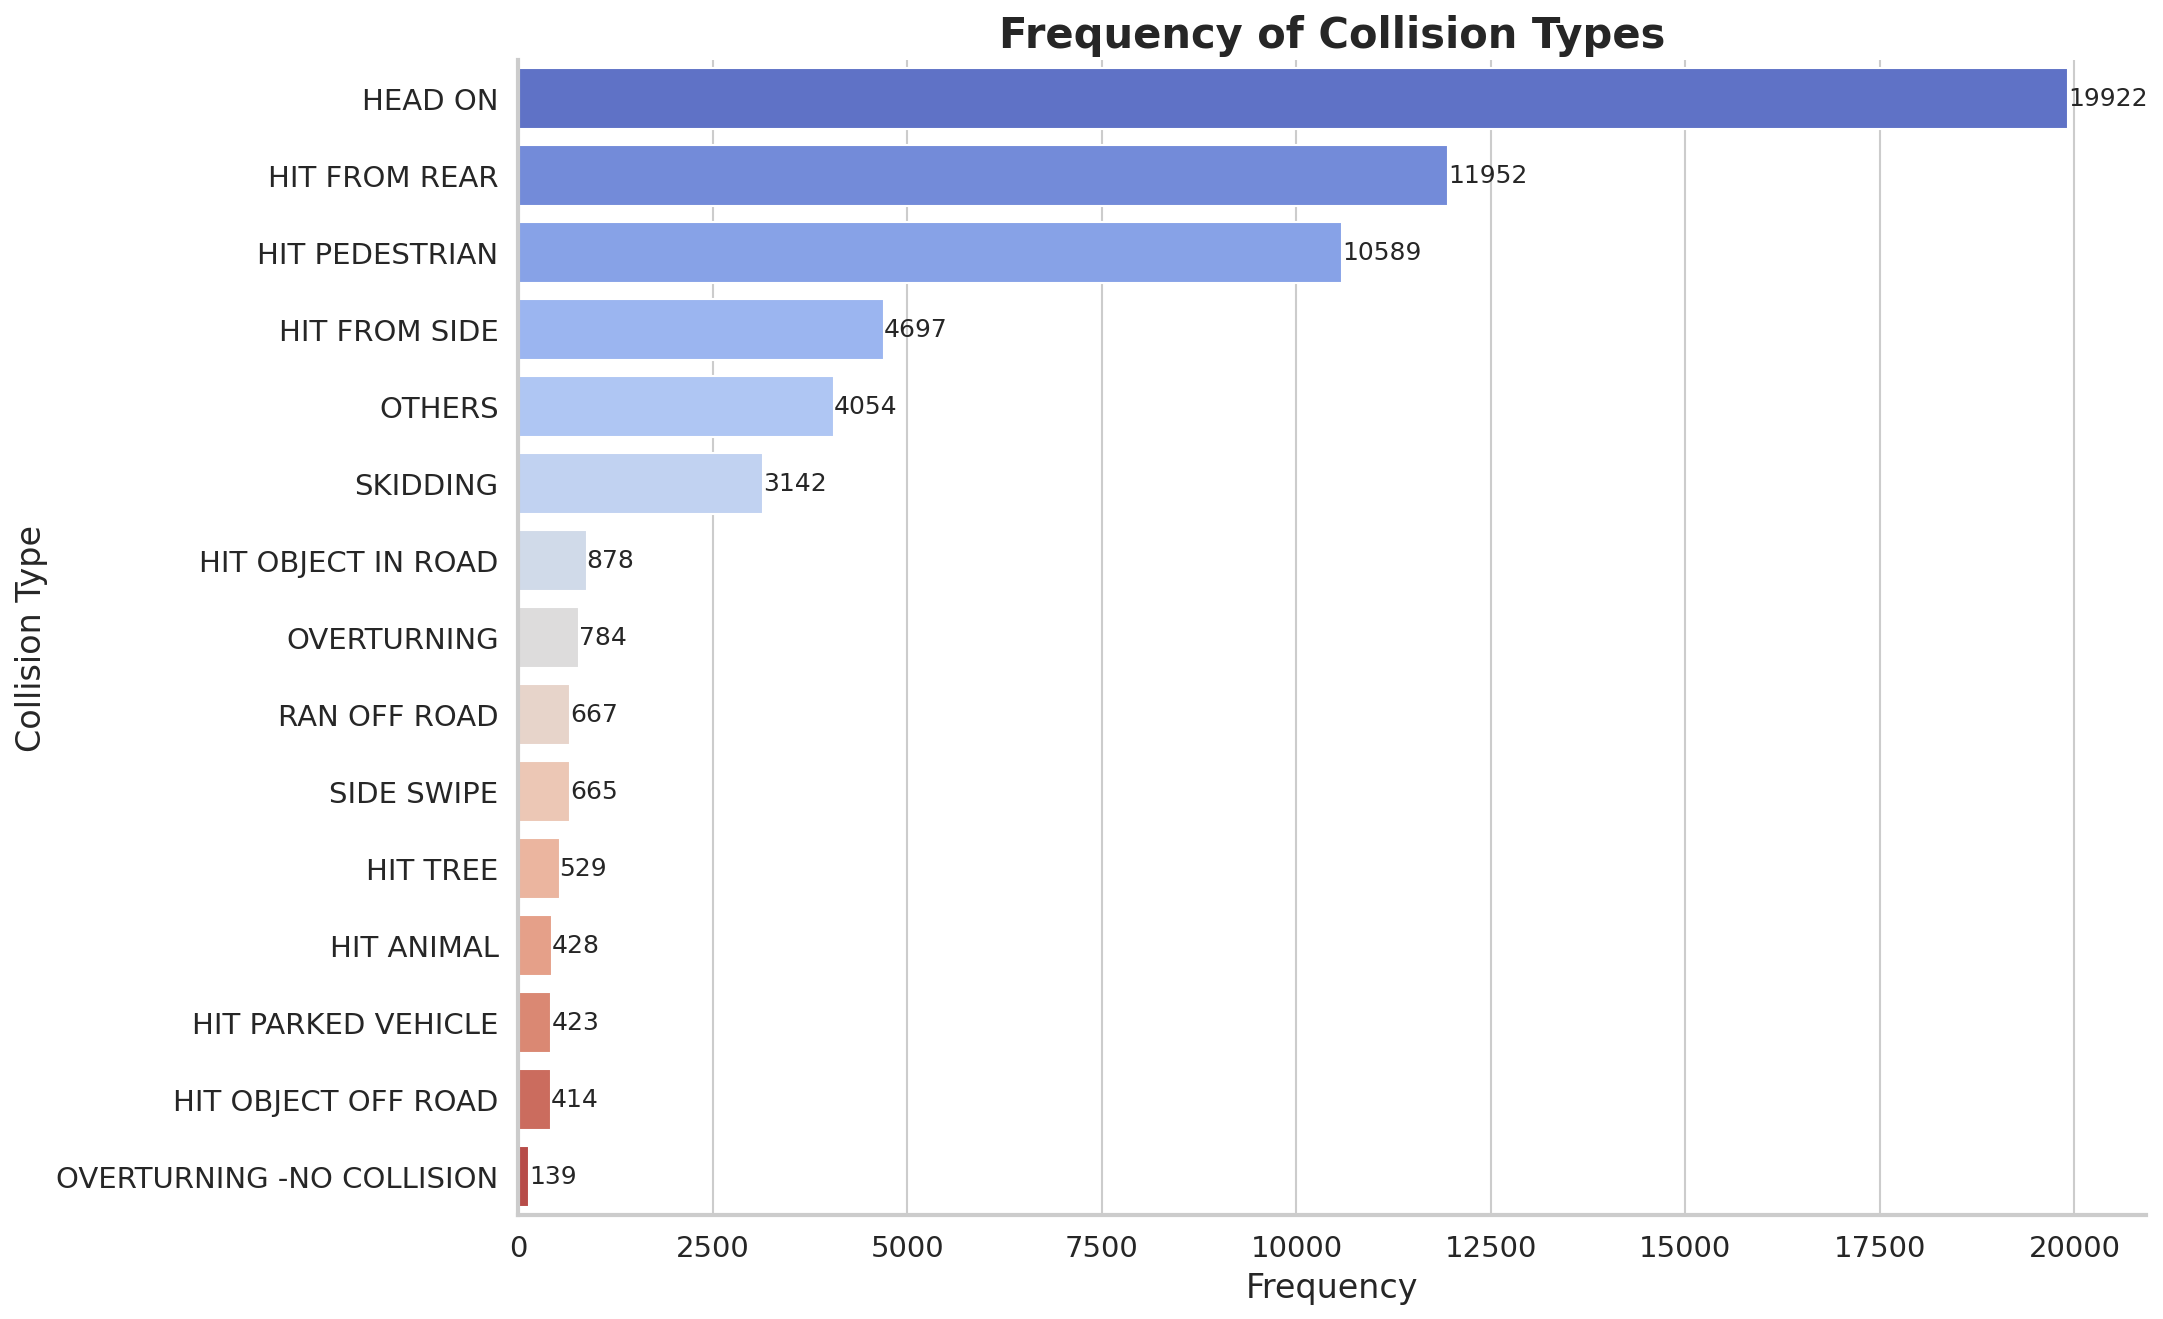

In [45]:
sns.set_style("whitegrid")

# Increase the figure size and resolution
plt.figure(figsize=(14, 10), dpi=150)

# Create a color palette
palette = sns.color_palette("coolwarm", len(collision_counts))

# Create the bar plot
sns.barplot(x='Frequency', y='Collision Type', data=collision_counts, palette=palette)

# Add titles and labels with appropriate font size
plt.title('Frequency of Collision Types', fontsize=20, fontweight='bold')
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Collision Type', fontsize=16)

# Customize tick parameters for readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a border for increased visibility
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Optionally, add text labels for each bar
for index, value in enumerate(collision_counts['Frequency']):
    plt.text(value, index, str(value), fontsize=12, va='center')

# Show the plot
plt.show()


In [46]:
road_type_counts = df['ROAD TYPE'].value_counts().reset_index()
road_type_counts.columns = ['Road Type', 'Accidents']


/tmp/ipykernel_81411/2532789679.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




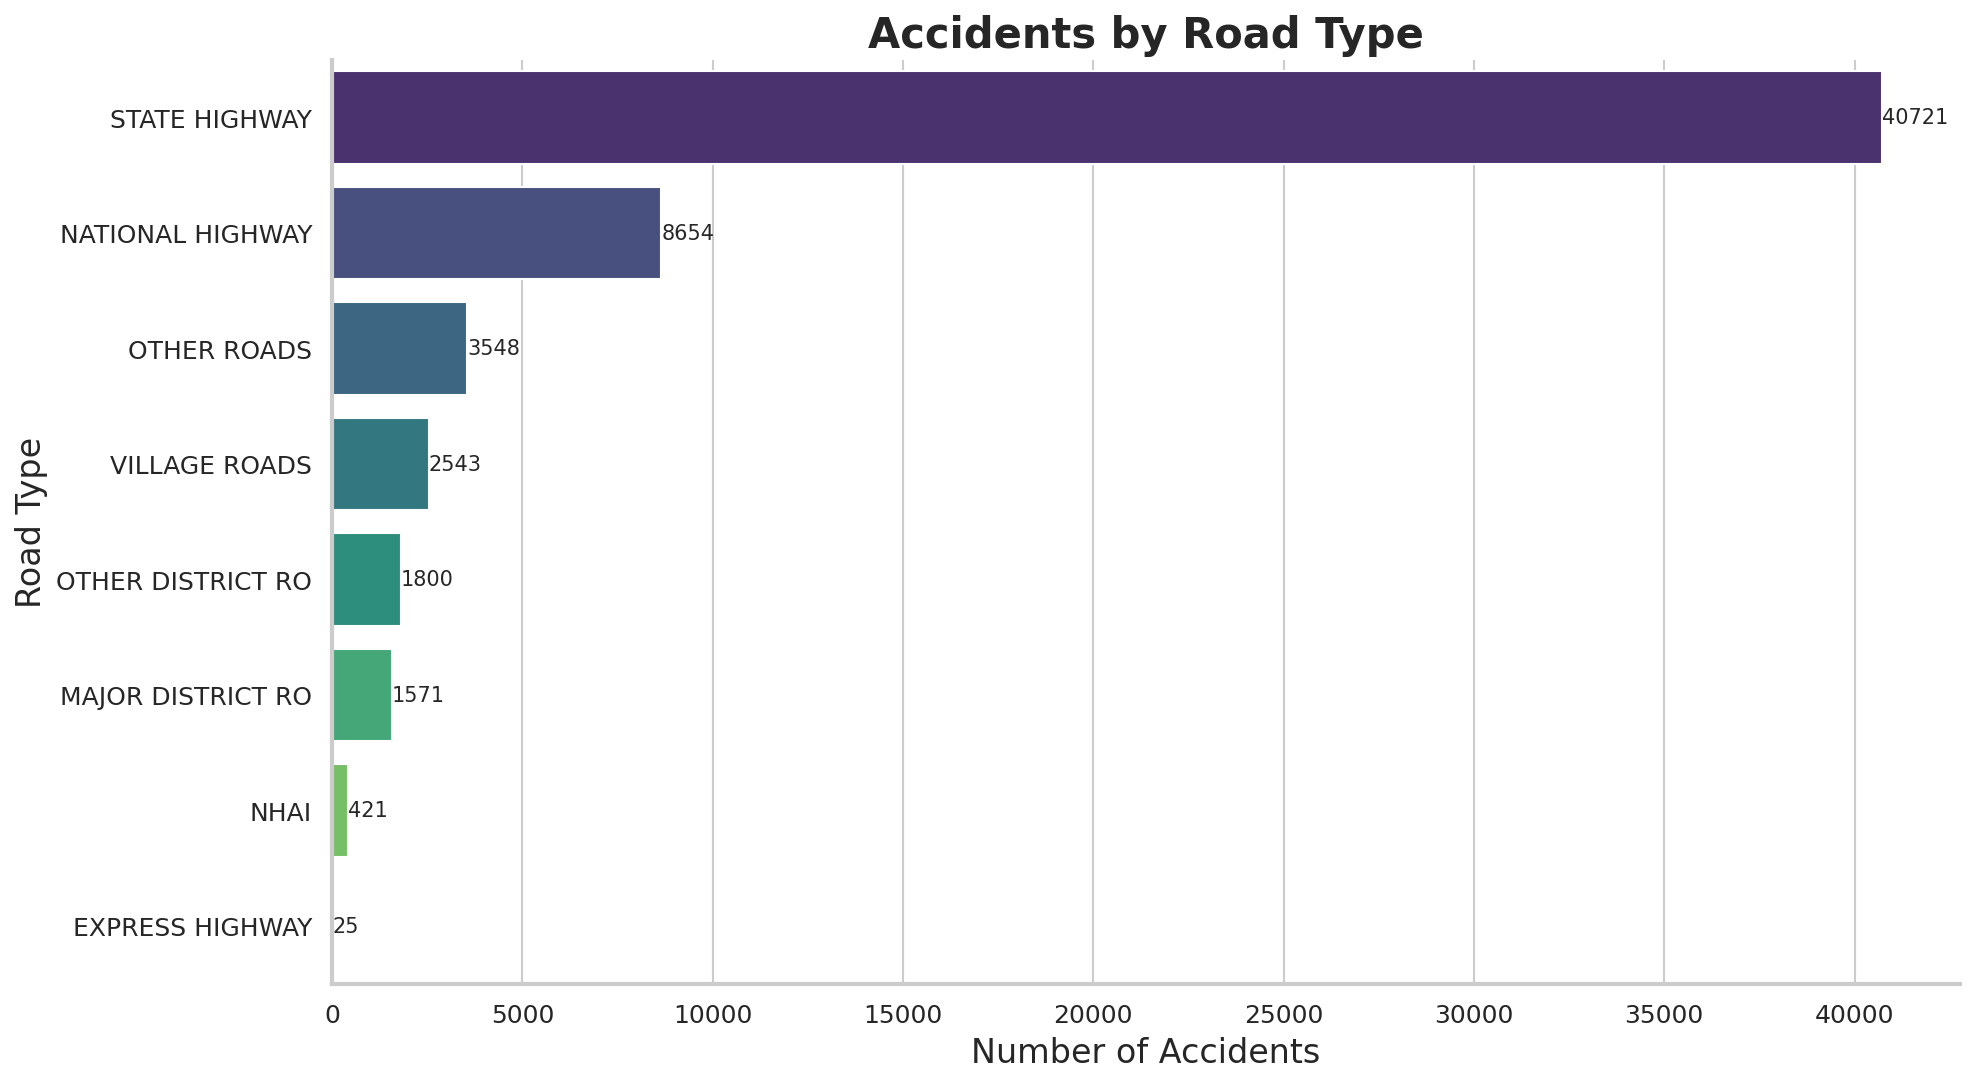

In [47]:
sns.set_style("whitegrid")

# Increase the figure size and resolution
plt.figure(figsize=(14, 8), dpi=150)

# Create a color palette
palette = sns.color_palette("viridis", len(road_type_counts))

# Create the bar plot
sns.barplot(x='Accidents', y='Road Type', data=road_type_counts, palette=palette)

# Add titles and labels with appropriate font size
plt.title('Accidents by Road Type', fontsize=20, fontweight='bold')
plt.xlabel('Number of Accidents', fontsize=16)
plt.ylabel('Road Type', fontsize=16)

# Customize tick parameters for readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a border for increased visibility
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Optionally, add text labels for each bar
for index, value in enumerate(road_type_counts['Accidents']):
    plt.text(value, index, str(value), fontsize=10, va='center')

# Show the plot
plt.show()


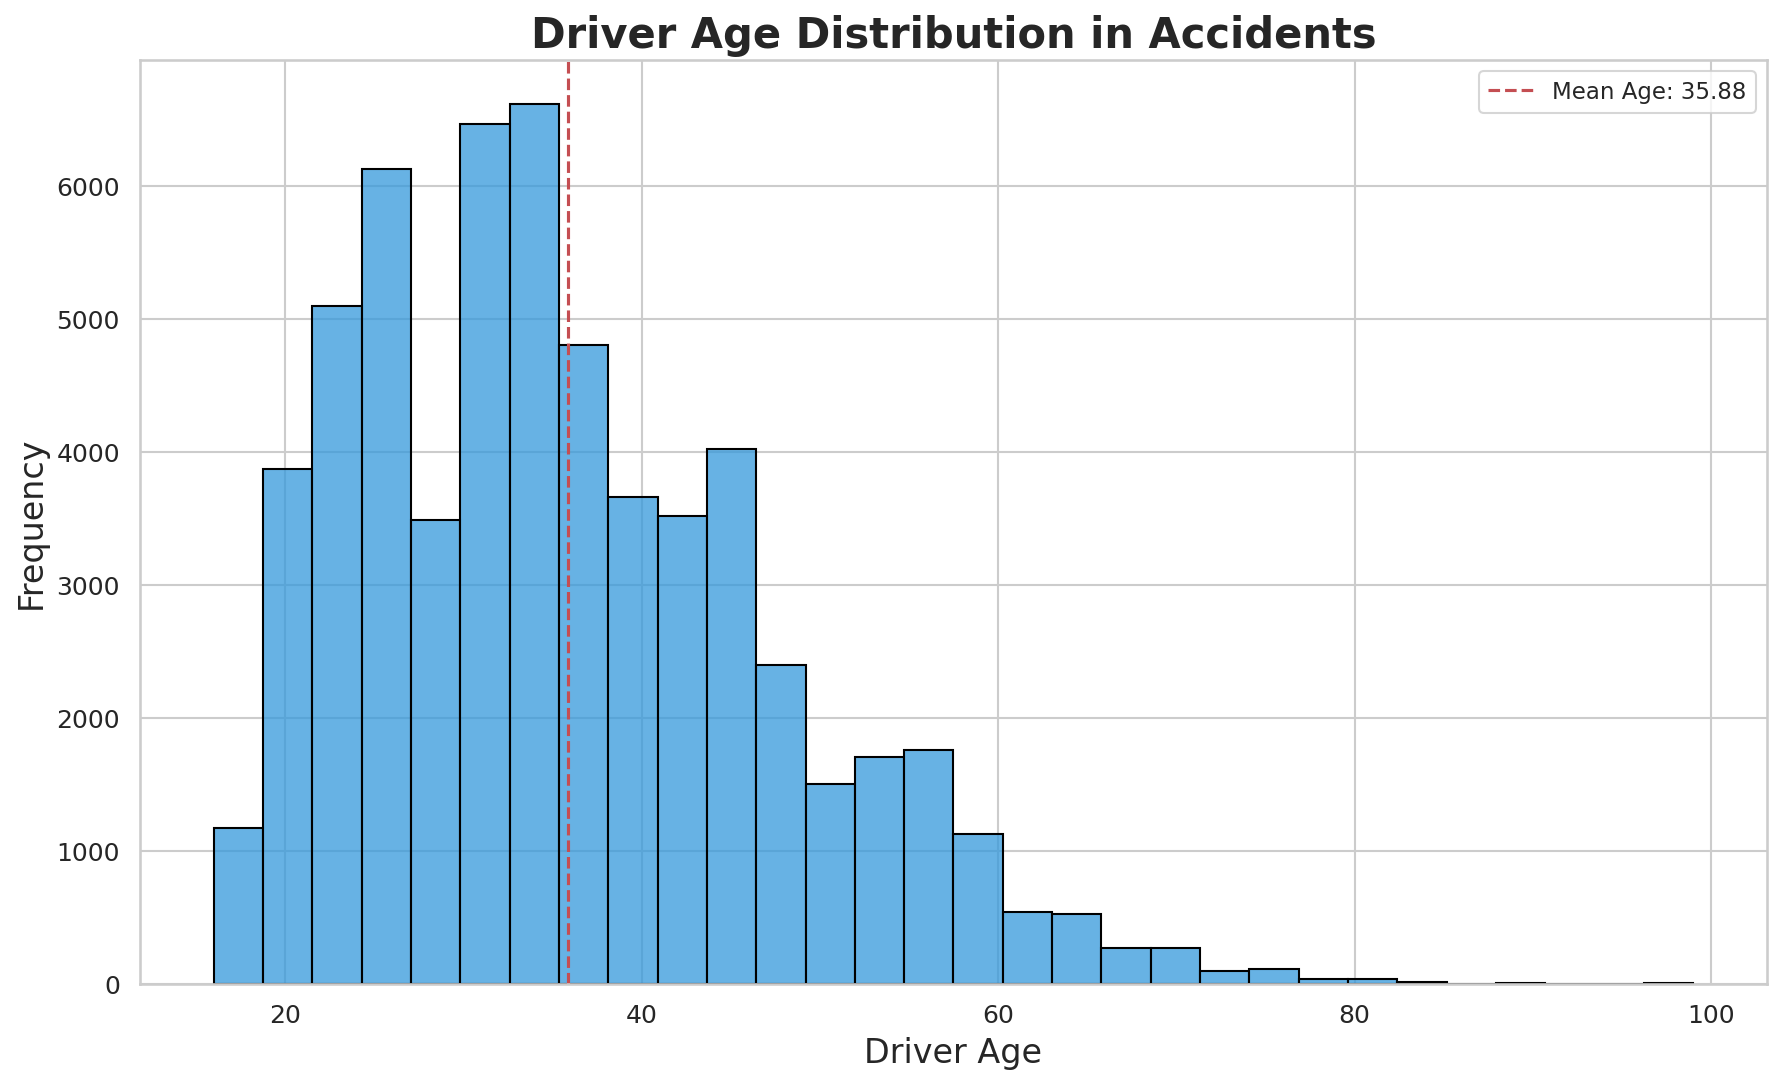

In [48]:
sns.set_style("whitegrid")

# Increase the figure size and resolution
plt.figure(figsize=(14, 8), dpi=150)

# Choose a color
color = "#3498db"  # A pleasant blue

# Create the histogram
sns.histplot(df['DRIVER AGE'], bins=30, color=color, edgecolor='black')

# Add titles and labels with appropriate font size
plt.title('Driver Age Distribution in Accidents', fontsize=20, fontweight='bold')
plt.xlabel('Driver Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Customize tick parameters for readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a mean line
mean_age = df['DRIVER AGE'].mean()
plt.axvline(mean_age, color='r', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.legend()

# Show the plot
plt.show()


/tmp/ipykernel_81411/1991412359.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




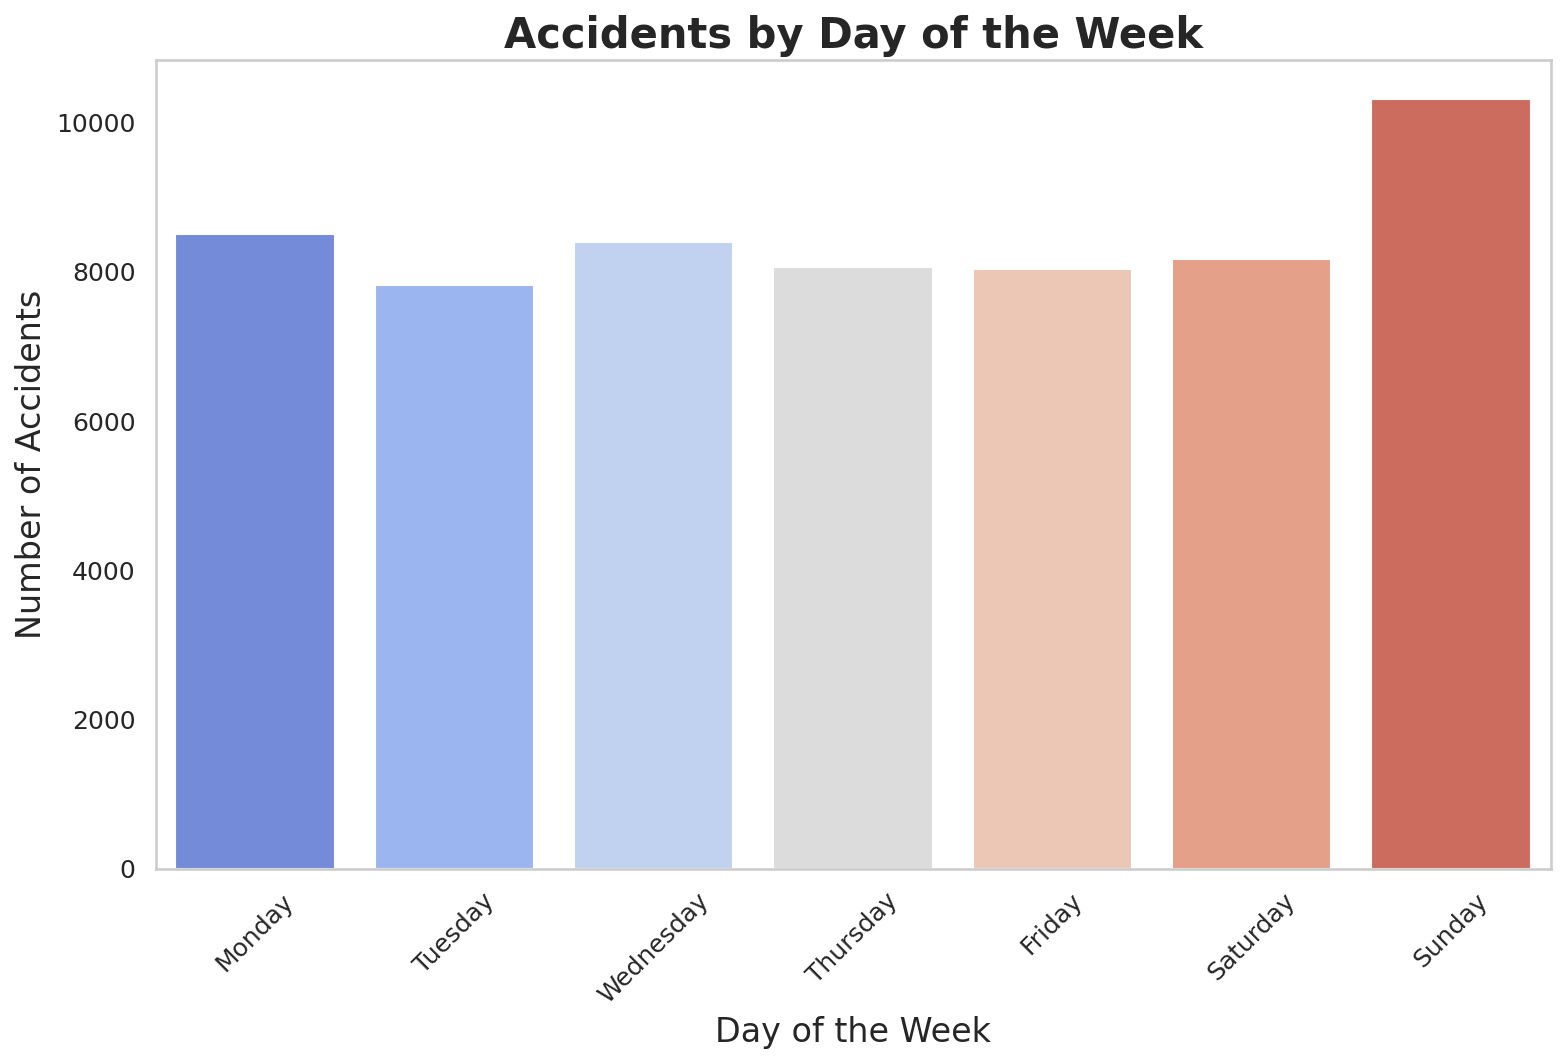

In [49]:
accidents_per_day = df['DAY'].value_counts().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Increase the figure size and resolution
plt.figure(figsize=(12, 7), dpi=150)

# Choose a color palette
palette = sns.color_palette("coolwarm", 7)

# Create the bar chart
sns.barplot(x=accidents_per_day.index, y=accidents_per_day.values, palette=palette)

# Add titles and labels with appropriate font size
plt.title('Accidents by Day of the Week', fontsize=20, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)

# Customize tick parameters for readability
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Optional: Add a horizontal grid for better readability
plt.grid(axis='y')

# Show the plot
plt.show()


In [52]:
# This step temporarily parses '24_HOUR_TIME' as datetime just for extracting hours
hours = pd.to_datetime(df['24_HOUR_TIME'], format='%H:%M').dt.hour


ValueError: unconverted data remains when parsing with format "%H:%M": ":00", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

/tmp/ipykernel_81411/3403341164.py:15: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



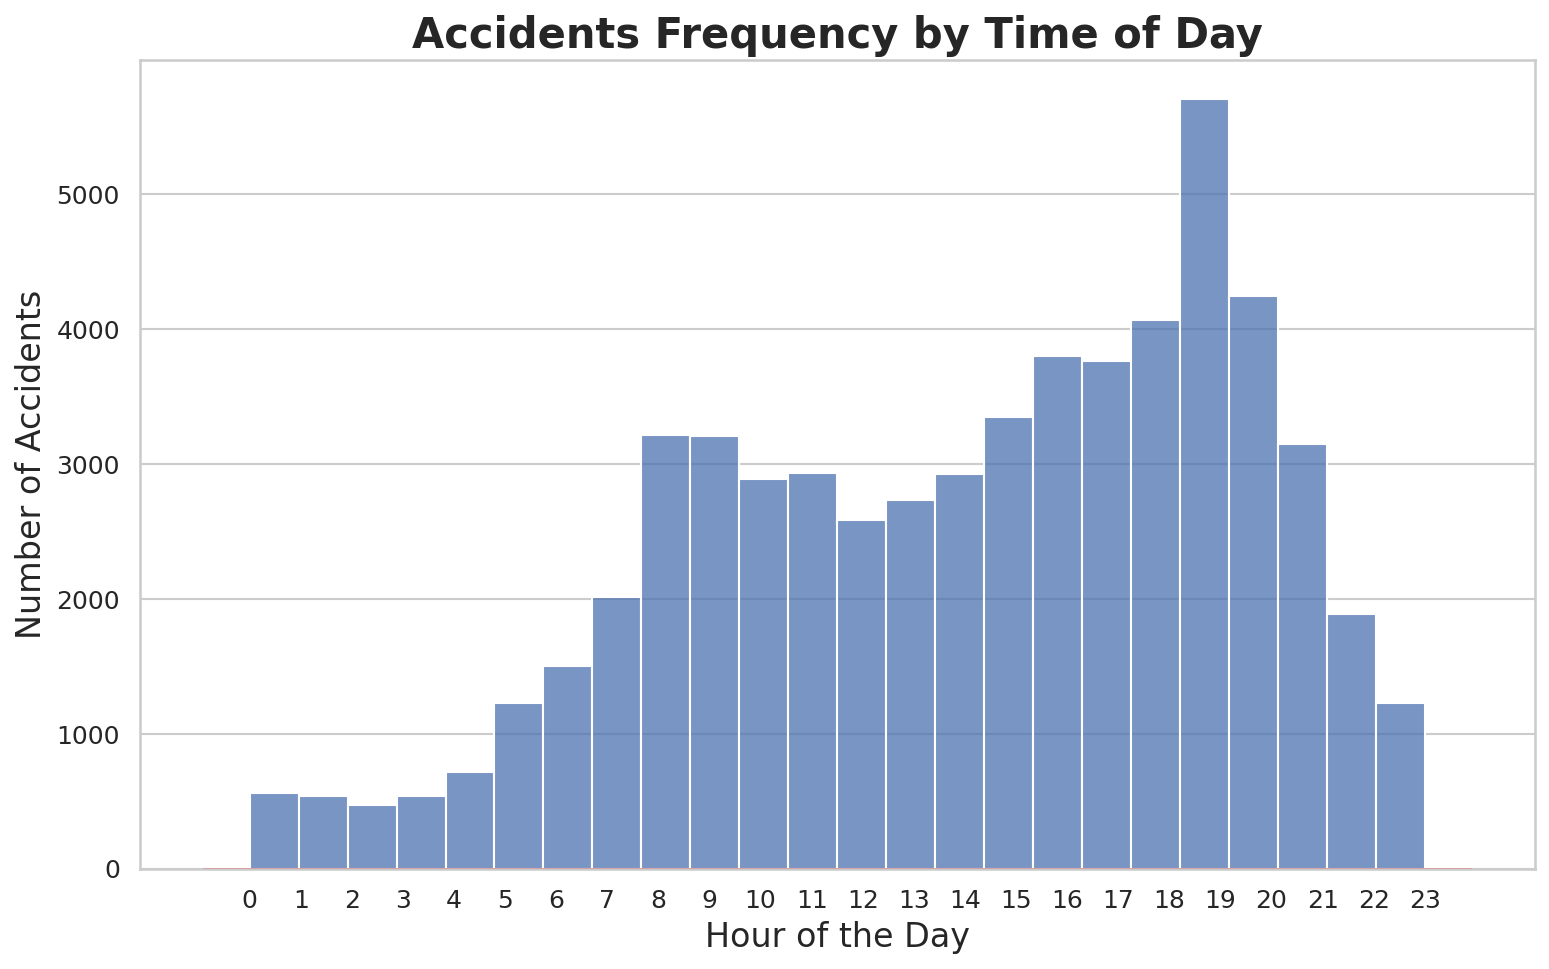

In [53]:
# Manually extract the hour part from the '24_HOUR_TIME' column assuming it's in 'HH:MM' format
# This step involves splitting the string by ':' and taking the first part (hours)
hours = df['24_HOUR_TIME'].str.split(':').str[0].astype(int)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Increase the figure size and resolution
plt.figure(figsize=(12, 7), dpi=150)

# Choose a color palette
palette = sns.color_palette("Spectral", as_cmap=True)

# Create the histogram using the manually extracted hours
sns.histplot(hours, bins=24, palette=palette, kde=False)

# Adding a density plot (KDE) for smoother representation of distribution
sns.kdeplot(hours, color='red', bw_adjust=0.5, fill=True, alpha=0.3)

# Add titles and labels with appropriate font size
plt.title('Accidents Frequency by Time of Day', fontsize=20, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)

# Customize tick parameters for readability
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)

# Optional: Add a vertical grid for better readability
plt.grid(axis='x')

# Show the plot
plt.show()


/tmp/ipykernel_81411/2073634302.py:8: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



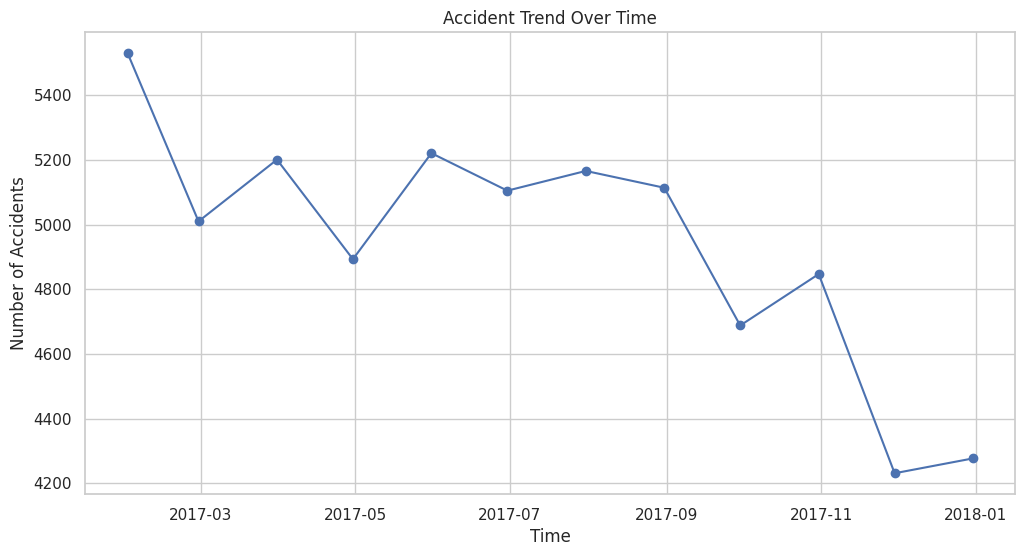

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DATE column is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Resample or group by month/year and count accidents
monthly_accidents = df.resample('M', on='DATE').size()
# or for yearly: df.resample('Y', on='DATE').size()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_accidents.index, monthly_accidents, marker='o', linestyle='-')
plt.title('Accident Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.show()


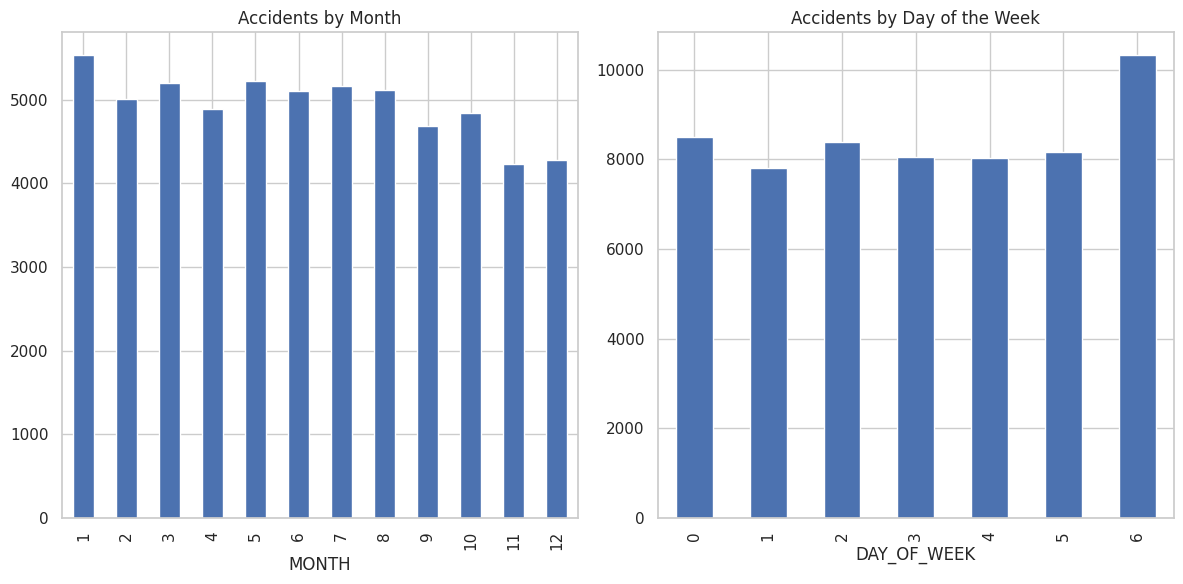

In [55]:
# Extract month and day of the week
df['MONTH'] = df['DATE'].dt.month
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek  # Monday=0, Sunday=6

# Aggregate and plot
monthly_counts = df.groupby('MONTH').size()
day_counts = df.groupby('DAY_OF_WEEK').size()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
monthly_counts.plot(kind='bar')
plt.title('Accidents by Month')

plt.subplot(1, 2, 2)
day_counts.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.tight_layout()
plt.show()


In [56]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 476.4 kB/s eta 0:00:001m756.0 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 279.4 kB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 291.1 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 167.2 kB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 320.0 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 212.3 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 147.9 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 136.7 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 167.5 kB/s eta 0:00:0

In [ ]:
from fbprophet import Prophet

# Prepare the data
df_prophet = df.resample('M', on='DATE').size().reset_index()
df_prophet.columns = ['ds', 'y']

# Initialize and fit the model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Predict the next 12 months
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)